In [3]:
import pandas as pd
import datetime as dt
import re

race_df = pd.read_csv("../scraping/fis_scrape/worldloppet_races.csv")

#how many racers
print(len(race_df))

#define index for get function
#print(race_df.race_description.str.split()[1])

new_race_df = race_df.copy()
new_race_df.head(5)

#break down formatting one at a time to troubleshoot any new errors

614292


,race_description,race_name,racer_nationality,racer_time
0,12.08.2017 48 km CT,Ushuaia Loppet Main,ARG,02:16:34
1,12.08.2017 48 km CT,Ushuaia Loppet Main,ARG,02:35:10
2,12.08.2017 48 km CT,Ushuaia Loppet Main,POL,02:48:40
3,12.08.2017 48 km CT,Ushuaia Loppet Main,ARG,02:49:54
4,12.08.2017 48 km CT,Ushuaia Loppet Main,ARG,02:51:14


In [4]:
#race date
new_race_df['date'] = pd.to_datetime(race_df.race_description.str.split().str.get(0).str.replace(".", "-"))

In [3]:
#race distance
new_race_df['distance'] = pd.to_numeric(race_df.race_description.str.split().str.get(1).str.replace(',', '.'))

In [4]:
#race style
new_race_df['style'] = race_df.race_description.str.split().str.get(3)

In [5]:
#racer nationality
new_race_df['racer_nationality'] = new_race_df['racer_nationality'].str.upper()

In [6]:
#racer time 
new_race_df['racer_time'] = pd.to_timedelta(new_race_df.racer_time.str.extract('(\d+[:|.]\d{2}[:|.]\d{2})').str.replace(".", ":"))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


In [7]:
new_race_df['racer_pace'] = new_race_df['distance'] / (new_race_df['racer_time'] / dt.timedelta(hours=1))

In [22]:
### after evaluating racer_pace, I came to the realization that there are some "DNF" finish times
### therefore, I will split the df into two: race_finishers and race_dnf using null/notnull arguments

race_finishers = new_race_df[pd.notnull(new_race_df.racer_pace)].copy()
#note, I should also filter out the American Birkie main from last year (bike pace)

race_dnf = new_race_df[pd.isnull(new_race_df.racer_pace)].copy()

In [9]:
### this is some Python EDA
### develop ideas for R / R shiny implementation

%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [2]:
race_finishers.groupby('race_name')['racer_pace'][1:11].max().sort_values().plot(kind = 'barh', color='b')

NameError: name 'race_finishers' is not defined

Text(0.5,1,'Race pace distribution')

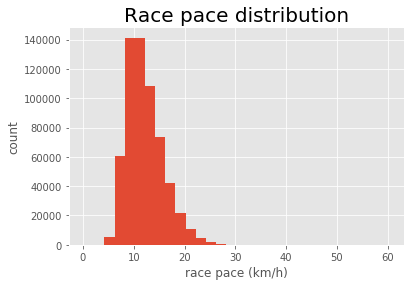

In [27]:
#dist of racer_pace 
plt.hist(race_finishers.racer_pace, bins = 30)
plt.xlabel('race pace (km/h)')
plt.ylabel('count')
plt.title('Race pace distribution', fontsize=20)

Text(0.5,1,'Participants by nationality')

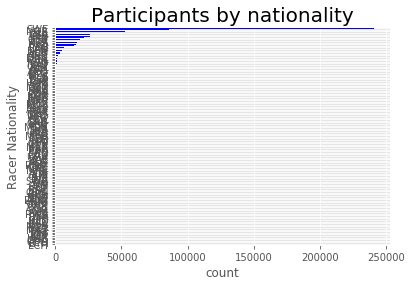

In [63]:
#count of racers by nationality in AUS race

#country_df.groupby('country')['imdb_score'].median().sort_values(ascending=False).plot.bar(color='b')

new_race_df.groupby('racer_nationality')['style'].count().sort_values().plot(kind = 'barh', color='b')
plt.xlabel('count')
plt.ylabel('Racer Nationality')
plt.title('Participants by nationality', fontsize=20)